In [45]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint
import networkx as nx
from networkx.readwrite import json_graph

df = pd.read_csv("data/data_scopus.csv")


In [46]:
df.head()

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,NaN,NaN,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,NaN
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,NaN,NaN,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,NaN
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,NaN,NaN,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,NaN


In [47]:
df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [48]:
def get_first_author_affilation(x):
  try:
    return x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)

In [49]:
df.head()

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by,First_author_Country
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN,Canada
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN,Italy
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Building Information Modeling (BIM) representa...,Elsevier B.V.,NaN,NaN,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,NaN,Serbia
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Social media analysis is helpful to understand...,Springer,NaN,NaN,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,NaN,Japan
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Due to increasing volume and unstructured natu...,Academic Press Inc.,NaN,NaN,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,NaN,India


<Axes: >

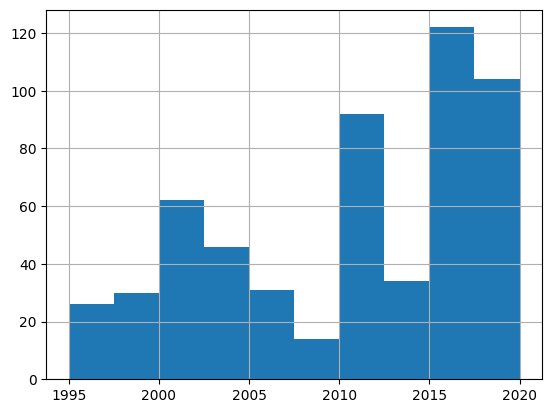

In [50]:
df.Year.hist()

In [51]:
df["Source title"].value_counts().reset_index()

,index,Source title
0,Proc. of the IADIS Int. Conf. Computer Graphic...,55
1,MCCSIS 2018 - Multi Conference on Computer Sci...,53
2,Proceedings of the International Conferences o...,49
3,Proceedings of the IEEE Visualization Conference,48
4,Proceedings of the IEEE Symposium on Informati...,41
5,Lecture Notes in Artificial Intelligence (Subs...,35
6,International Multidisciplinary Scientific Geo...,32
7,Proceedings of the ACM Symposium on Applied Co...,32
8,International Journal of Human Computer Studies,29
9,IS and T International Symposium on Electronic...,25


In [52]:
nodes = df['EID'].values
df = df.fillna(0)

In [53]:
df['Year'].max()

2020

In [54]:
df = df.dropna(subset=['Author(s) ID','Year','Authors','Authors with affiliations'])

# nodes = df['Author(s) ID'].values
df = df.fillna(0)
G = nx.Graph()

for _, row in df.iterrows():
    authors = row['Authors'].split(',')
    author_ids = row['Author(s) ID'].split(';')
    title, year, citations, publisher, author_with_affiliations = row['Title'], row['Year'], row['Cited by'], row['Publisher'], row['Authors with affiliations']

    for author, author_id in zip(authors, author_ids):
        if author_id:
            node_data = {
                'id': author_id,
                'Authors': ';'.join(authors),
                'Title': title,
                'Year': year,
                'Citations': citations,
                'Publisher': publisher,
                'Author with affiliations': author_with_affiliations
            }
            G.add_node(author_id, **node_data)

print(G)

with open("data/pub_network.json", "w") as f:
    json.dump(json_graph.node_link_data(G), f)



Graph with 1552 nodes and 0 edges


In [55]:
with open('data/pub_network.json', 'r') as infile:
    data = json.load(infile)
    
G=nx.Graph()

def extract_author_country(authors_with_affiliations):
    affiliations = authors_with_affiliations.split(';')
    
    if affiliations:
        affiliation1 = affiliations[0].strip()
        country_parts = affiliation1.split(',')
        
        if len(country_parts) > 1:
            country = country_parts[-1].strip()
            return country
    
    # Fallback value if the country couldn't be extracted
    return None

for node in data['nodes']:
    eid = node.get('id')
    authors = node.get('Authors')
    title = node.get('Title')
    year = node.get('Year')
    citations = node.get('Citations')
    publisher = node.get('Publisher')
    authors_with_affiliations = str(node.get('Author with affiliations'))

    # Assuming extract_author_country returns the country
    country = extract_author_country(authors_with_affiliations)

    # Use a dictionary to store node attributes for better readability
    node_attributes = {
        'authors': authors,
        'title': title,
        'year': year,
        'citations': citations,
        'publisher': publisher,
        'authors_with_affiliations': authors_with_affiliations,
        'country': country
    }

    G.add_node(eid, **node_attributes)

clusters = list(nx.connected_components(G))

class_mapping = {node: idx for idx, cluster in enumerate(clusters) for node in cluster}
nx.set_node_attributes(G, class_mapping, 'class')

# Assuming df is a pandas DataFrame and 'Author(s) ID' is a column in df
for _, row in df.iterrows():
    authors = [a for a in row['Author(s) ID'].split(';') if a]
    coauthor_pairs = [(authors[i], authors[j]) for i in range(len(authors)) for j in range(i + 1, len(authors))]

    for author1, author2 in coauthor_pairs:
        G.add_edge(author1, author2)


print(G)

coauthorship_data = {'nodes': [{'id': node, **G.nodes[node]} for node in G.nodes()],'links': [{'source': source, 'target': target} for source, target in G.edges()]}
with open('data/co_authorship_data.json', 'w', encoding='utf-8') as outfile:
    json.dump(coauthorship_data, outfile, ensure_ascii=False)


Graph with 1552 nodes and 3049 edges
